In [15]:
import os
from os.path import join
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

In [3]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()

In [ ]:
df.nombre.value_counts()

In [ ]:
df['nombre'].str.replace(r"^nan$",'',regex=True).value_counts()

In [6]:
#Calculo de la edad
df['edad_est'] = ((df['fec_def'] - df['fec_nac']))/ np.timedelta64(1, 'Y')

In [7]:
df.columns

Index(['nom_c', 'sexo', 'edad_c', 'edad', 'res_ent', 'res_mun', 'res_loc',
       'curp', 'afiliacion', 'edo_civil', 'escolar', 'ocupacion', 'def_ent',
       'def_mun', 'def_loc', 'causa_bas', 'base', 'fec_nac', 'fec_def',
       'miscol', 'nombre', 'edad_est'],
      dtype='object')

In [8]:
df[['sexo','edad','edad_c','edad_est']]

,sexo,edad,edad_c,edad_est
0,1,888,0,NaN
1,0,888,0,NaN
2,0,888,0,NaN
3,2,888,0,86.296091
4,1,888,0,NaN
...,...,...,...,...
606162,1,999,9,NaN
606163,1,999,9,NaN
606164,1,999,9,NaN
606165,1,999,9,NaN


(array([2.037042e+06, 6.819730e+06, 5.705300e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 3.055000e+03, 0.000000e+00, 1.680100e+04]),
 array([  0.  ,  49.95,  99.9 , 149.85, 199.8 , 249.75, 299.7 , 349.65,
        399.6 , 449.55, 499.5 , 549.45, 599.4 , 649.35, 699.3 , 749.25,
        799.2 , 849.15, 899.1 , 949.05, 999.  ]),
 <BarContainer object of 20 artists>)

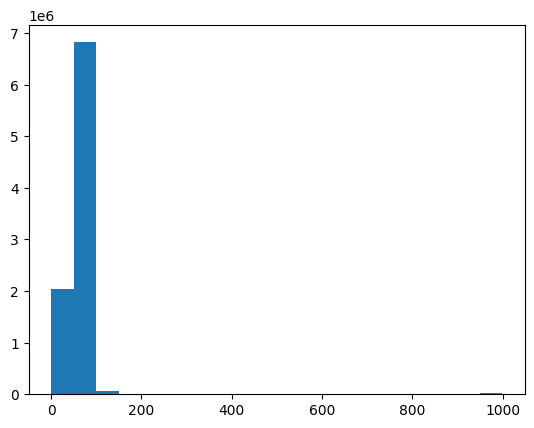

In [9]:
plt.hist(df.edad, bins=20)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_9370/1497052539.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


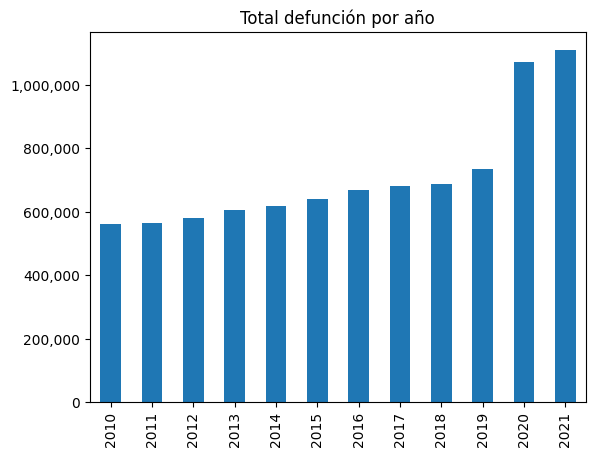

In [21]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar')
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
plt.show();